In [85]:
from pysr import PySRRegressor, TemplateExpressionSpec

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'stixgeneral'
import numpy as np

import camb

In [86]:
# Load Data
pars     = np.load('CL_data/parameter_test9.npy')  # [H0, ombh2, omch2 ] x 100
lensed   = np.load('CL_data/lensed_CL9.npy')     # [C_2, ..., C_5000] x 100 (lensed)
unlensed = np.load('CL_data/unlensed_CL9.npy')     # [C_2, ..., C_5000] x 100 (unlensed)

In [87]:
pars_pysr = pars

ells = np.array([l for l in range(2, 5000)])

In [88]:
def clamp(z, high, low):
    return (1/(1+np.exp(z)))*(high-low) + low

In [89]:
def get_lensing_camb(omb, omc):
    pars = camb.set_params(H0 = 67.4, ombh2 = omb, omch2 = omc, lmax=5000)
    results = camb.get_results(pars)
    powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')
    lensed = powers['total'][2:5000, 0]
    unlensed = powers['unlensed_total'][2:5000, 0]
    return lensed/unlensed

In [90]:
ombs = [0.02, 0.022, 0.022, 0.022, 0.022, 0.022]
omcs = [0.1, 0.1, 0.12, 0.15, 0.18, 0.19]

In [91]:
[ombs[i] + omcs[i] for i in range(len(ombs))]

[0.12000000000000001, 0.122, 0.142, 0.172, 0.20199999999999999, 0.212]

In [107]:
ombs = [0.02, 0.022, 0.022, 0.022, 0.022, 0.022]
omcs = [0.1, 0.1, 0.12, 0.15, 0.18, 0.19]

ombs = [0.02, 0.022, 0.022]
omcs = [0.1, 0.1, 0.12]

n = len(omcs)
lensings_camb = [get_lensing_camb(ombs[i], omcs[i]) for i in range(n)]

label_key = ["$\\Omega_bh^2$ = " + str(ombs[i]) + ", $\\Omega_ch^2$ = " + str(omcs[i]) for i in range(n)]

fid_ombh2 = 0.0224
fid_omch2 = 0.12

In [108]:
fid_ombh2 + fid_omch2

0.1424

In [109]:
clamp(-0.2, -1, 1)

-0.0996679946249559

In [113]:
def lensing_tail_fit(ell, ombh2, omch2):
    x2 = (ombh2 + omch2)/(fid_omch2 + fid_ombh2)
    x1 = ombh2/fid_ombh2
    print(x2)
        
    shift1, shift2 = [-0.01296149,  0.3473414 ]
    
    beta_1 = 0.7
    beta_2 = 2800
    
    beta_3 = 3776 * (1+ 0.28372636 - (x2 * 1.8409984))
    beta_4 = 341 * (1 + 0.33426225)
    alpha =  x2/0.4
        
    sigm = (1 + np.exp(-(ell-beta_3)/beta_4))**(-1)

    poly = (beta_1*(ell/beta_2)**alpha - 1)
    
    L = poly*sigm + 1
    
    return L


In [114]:
lensings_fit = [lensing_tail_fit(ells, ombs[i], omcs[i]) for i in range(n)]

0.8426966292134832
0.8567415730337079
0.997191011235955


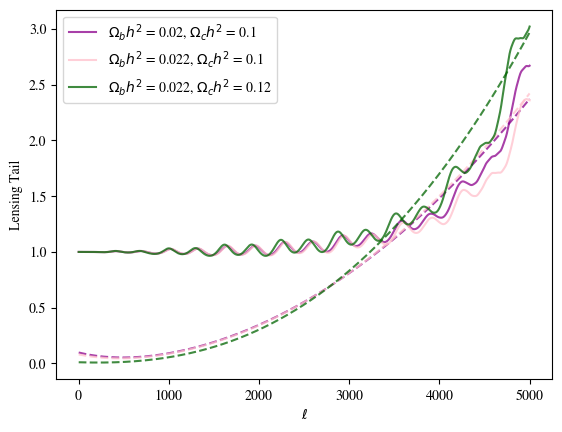

In [115]:
color_key = ["darkmagenta", "pink", "darkgreen", "aqua", "slateblue", "palegreen"]
for i in range(n):
    plt.plot(ells, lensings_fit[i], color = color_key[i], linestyle = "dashed", alpha = 0.75)
    plt.plot(ells, lensings_camb[i], color = color_key[i], label = label_key[i], alpha = 0.75)
plt.xlabel("$\\ell$")
plt.ylabel("Lensing Tail")
#plt.ylim(0.9,3)
plt.legend()